# **Описание проекта**

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Партнёры просят нас подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.

## **Описание данных**
# Таблица rest_data:

* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.






# **План выполнения**:
* Шаг 1. Загрузим данные и подготовим их к анализу;
* Шаг 2. Проанализируем данные;
* Шаг 3. Подготовим презентацию.


## **Шаг 1. Загрузка данных**.

In [1]:
import pandas as pd
pd.set_option('max_colwidth', 400)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [2]:
df=pd.read_csv('/datasets/rest_data.csv')


In [3]:
#df=pd.read_csv('rest_data.csv')

In [4]:
df.isnull().values.any()

False

In [5]:
df.isna().sum() 

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

В файле нет пропущенных значений. 

In [6]:
df[df.duplicated()]

,id,object_name,chain,object_type,address,number


Дубликаты данных отсутствуют.

In [7]:
def analysis(df):
    display(df.describe())
    display(df.info())
    display(df.head())

analysis(df)

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Тип данных в колонках верный. 

## **Шаг 2. Анализ данных**

### *2.1 Исследуем соотношение видов объектов общественного питания по количеству*.

In [8]:
df.groupby('object_type')['id'].count().sort_values(ascending=False)

object_type
кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: id, dtype: int64

In [9]:
def barplot_1 (x, y, data, title):
    plt.figure(figsize=(11,4))
    sns.barplot(x=x, y=y, data=data, estimator=len)
    plt.xticks(rotation=45)
    plt.title(label=title)

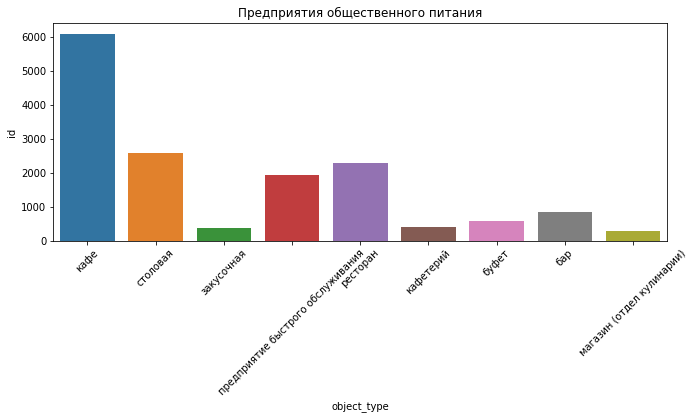

In [10]:
barplot_1(x='object_type', y='id', data=df, title='Предприятия общественного питания')

Среди предприятий общественного питания лидируют кафе и предприятие быстрого обслуживания. 

### *2.2 Исследуем соотношение сетевых и несетевых заведений по количеству*.

In [11]:
df.groupby('chain')['id'].count().sort_values(ascending=False)

chain
нет    12398
да      2968
Name: id, dtype: int64

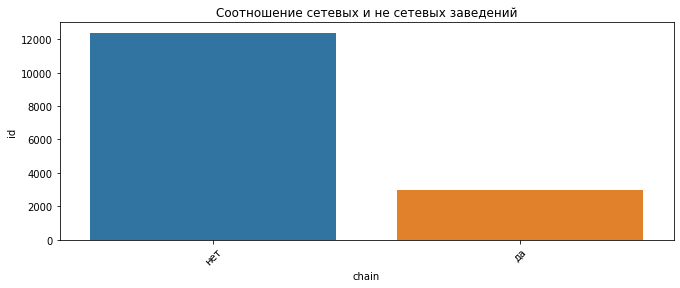

In [12]:
barplot_1(x='chain', y='id', data=df, title='Соотношение сетевых и не сетевых заведений')

Большинство предприятий в городе - не сетевые. 

### *2.3 Для какого вида объекта общественного питания характерно сетевое распространение?*

In [13]:
df[df['chain']=='да'].groupby('object_type')['chain'].count()


object_type
бар                                    37
буфет                                  11
закусочная                             56
кафе                                 1396
кафетерий                              52
магазин (отдел кулинарии)              78
предприятие быстрого обслуживания     791
ресторан                              544
столовая                                3
Name: chain, dtype: int64

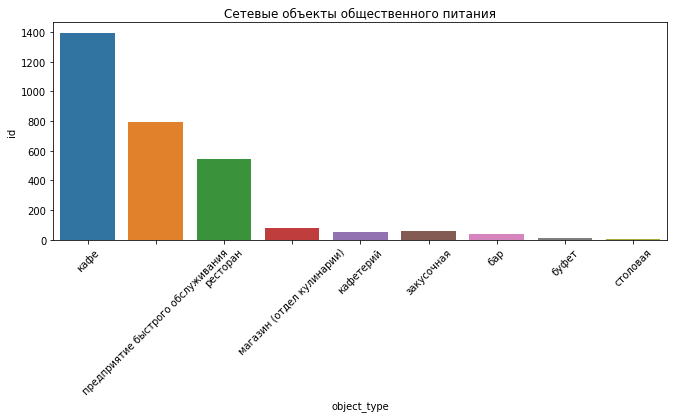

In [14]:
df_6 = df[df['chain']=='да']
barplot_1(x='object_type', y='id', data=df_6, title='Сетевые объекты общественного питания')

Сетевое распространение характерно больше всего для кафе и предприятия быстрого обслуживания. 

### *2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?*

In [15]:
df[df['chain']=='да'].groupby('number')['id'].count().sort_values(ascending=False).head(20)

number
0      268
20     161
40     144
10     131
50     122
30     122
60      96
15      78
45      74
25      69
80      68
48      63
35      59
12      55
70      55
90      55
100     47
8       46
150     46
4       44
Name: id, dtype: int64

Text(0.5, 1.0, 'Кол-во посадочных мест в сетевых заведениях')

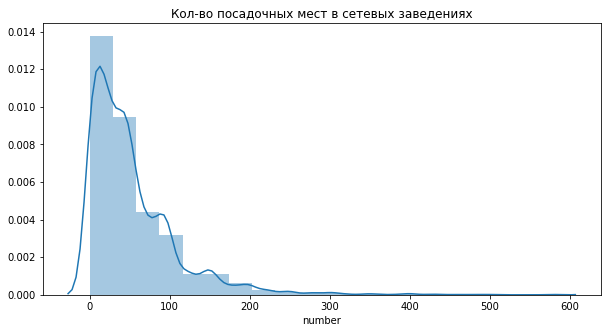

In [16]:
plt.figure(figsize=(10,5))
sns.distplot(df_6['number'], bins=20)
plt.title('Кол-во посадочных мест в сетевых заведениях')

Для сетевых заведений характерно небольшое число посадочных мест. 

### *2.5 Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?* 

In [17]:
df.groupby('object_type')['number'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
столовая,2587.0,130.246618,95.179313,0.0,50.0,103.0,200.0,1400.0
ресторан,2285.0,96.834136,94.756542,0.0,46.0,80.0,114.0,1500.0
буфет,585.0,51.129915,56.331974,0.0,14.0,32.0,80.0,320.0
бар,856.0,43.494159,67.082876,0.0,20.0,35.0,50.0,1700.0
кафе,6099.0,39.716019,37.720947,0.0,15.0,30.0,50.0,533.0
предприятие быстрого обслуживания,1923.0,20.552262,38.366974,0.0,0.0,5.0,25.0,580.0
кафетерий,398.0,9.123116,14.639150,0.0,0.0,6.0,12.0,200.0
закусочная,360.0,7.608333,16.650912,0.0,0.0,0.0,10.0,216.0
магазин (отдел кулинарии),273.0,5.589744,9.872729,0.0,0.0,0.0,8.0,50.0


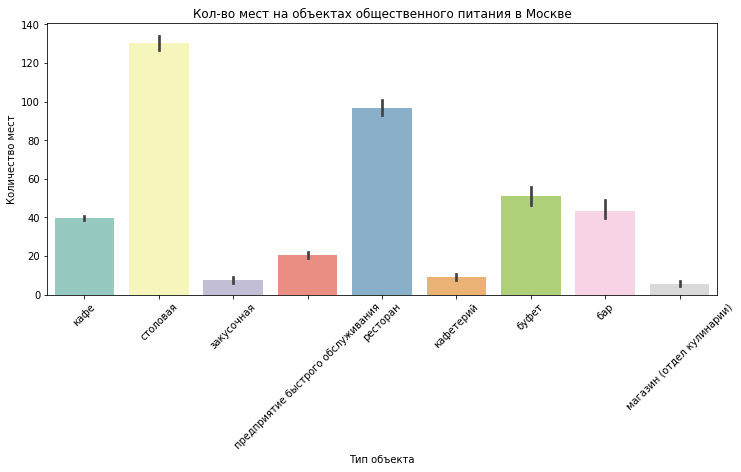

In [18]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='object_type', y='number', data=df, palette="Set3")
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество мест')
ax.set_title('Кол-во мест на объектах общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()


Самое большое кол-во мест в столовой и ресторане. 

### *2.6 Выделим в отдельный столбец информацию об улице из столбца address.*

In [19]:
df['street'] = df['address'].str.split(',', expand=True)[1]




In [20]:
df.head(10)

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240,Абрамцевская улица
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90,Авиамоторная улица
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150,Авиамоторная улица
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120,Авиамоторная улица


In [21]:
df['street'] = df['street'].astype('str').str.lstrip()

### *2.7 Построем график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?*

In [22]:
df_1 = df.groupby('street').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
top_10 = list(df_1['street'])
df_1

,street,id,object_name,chain,object_type,address,number
0,город Зеленоград,232,232,232,232,232,232
1,проспект Мира,204,204,204,204,204,204
2,Профсоюзная улица,182,182,182,182,182,182
3,Ленинградский проспект,171,171,171,171,171,171
4,Пресненская набережная,167,167,167,167,167,167
5,Варшавское шоссе,161,161,161,161,161,161
6,Ленинский проспект,147,147,147,147,147,147
7,поселение Сосенское,138,138,138,138,138,138
8,проспект Вернадского,132,132,132,132,132,132
9,Кутузовский проспект,114,114,114,114,114,114


Text(0.5, 1.0, 'Количество объектов общественного питания')

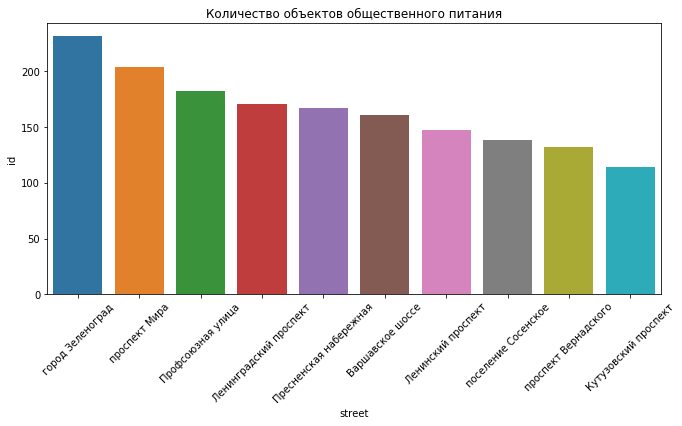

In [23]:
plt.figure(figsize=(11,5))
sns.barplot(x='street', y='id', data=df, estimator=len, order=df.street.value_counts().iloc[:10].index)                                                                          
plt.xticks(rotation=45)
plt.title('Количество объектов общественного питания')



In [24]:
df_street = pd.read_csv('https://raw.githubusercontent.com/Distans/temp/main/mosgaz-streets.csv')
df_street.columns=['street', 'areaid', 'okrug', 'area']
df_street.head()

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [25]:
df_1

,street,id,object_name,chain,object_type,address,number
0,город Зеленоград,232,232,232,232,232,232
1,проспект Мира,204,204,204,204,204,204
2,Профсоюзная улица,182,182,182,182,182,182
3,Ленинградский проспект,171,171,171,171,171,171
4,Пресненская набережная,167,167,167,167,167,167
5,Варшавское шоссе,161,161,161,161,161,161
6,Ленинский проспект,147,147,147,147,147,147
7,поселение Сосенское,138,138,138,138,138,138
8,проспект Вернадского,132,132,132,132,132,132
9,Кутузовский проспект,114,114,114,114,114,114


In [26]:
df_1.shape

(10, 7)

In [27]:
df_street.shape

(4398, 4)

In [28]:
df_street[df_street['street'] == 'проспект Мира']['street'][2293]

'проспект Мира'

In [29]:
len(df_street[df_street['street'] == 'проспект Мира']['street'][2293])

13

In [30]:
df_1['street'][1]

'проспект Мира'

In [31]:
len(df_1['street'][1])

13

In [32]:
df_new=df_1.merge(df_street, left_on='street', right_on='street', how='left')
df_new.tail(30)

,street,id,object_name,chain,object_type,address,number,areaid,okrug,area
15,Профсоюзная улица,182,182,182,182,182,182,131.0,ЮЗАО,Район Теплый Стан
16,Ленинградский проспект,171,171,171,171,171,171,54.0,САО,Район Аэропорт
17,Ленинградский проспект,171,171,171,171,171,171,55.0,САО,Район Беговой
18,Ленинградский проспект,171,171,171,171,171,171,69.0,САО,Хорошевский район
19,Ленинградский проспект,171,171,171,171,171,171,66.0,САО,Район Сокол
20,Пресненская набережная,167,167,167,167,167,167,17.0,ЦАО,Пресненский район
21,Варшавское шоссе,161,161,161,161,161,161,109.0,ЮАО,Район Чертаново Центральное
22,Варшавское шоссе,161,161,161,161,161,161,108.0,ЮАО,Район Чертаново Северное
23,Варшавское шоссе,161,161,161,161,161,161,110.0,ЮАО,Район Чертаново Южное
24,Варшавское шоссе,161,161,161,161,161,161,99.0,ЮАО,Донской район


Лидируют по кол-ву мест общественного питания улицы:
- Проспект Мира (СВАО);
- Профсоюзная улица (ЮЗАО);
- Ленинградский проспект (САО);
- Пресненская набережная (ЦАО);
- Варшавское шоссе (ЮАО);
- Ленинский проспект (ЮЗАО);
- проспект Вернадского (ЮЗАО);
- Кутузовский проспект (ЗАО)

In [33]:
df_total=df.merge(df_street, left_on='street', right_on='street', how='left')
df_total.tail(30)

,id,object_name,chain,object_type,address,number,street,areaid,okrug,area
30394,213602,Тануки,да,кафе,"город Москва, Привольная улица, дом 65/32",50,Привольная улица,111.0,ЮВАО,Район Выхино-Жулебино
30395,213772,Тануки,да,ресторан,"город Москва, Осенний бульвар, дом 9",98,Осенний бульвар,39.0,ЗАО,Район Крылатское
30396,210400,Шоколадница,да,кафе,"город Москва, Театральный проезд, дом 5, строение 1",45,Театральный проезд,19.0,ЦАО,Тверской район
30397,210400,Шоколадница,да,кафе,"город Москва, Театральный проезд, дом 5, строение 1",45,Театральный проезд,16.0,ЦАО,Мещанский район
30398,74972,Шоколадница,да,кафе,"город Москва, улица Новый Арбат, дом 13",30,улица Новый Арбат,12.0,ЦАО,Район Арбат
30399,220618,Шоколадница,да,кафе,"город Москва, Митинская улица, дом 36, корпус 1",100,Митинская улица,88.0,СЗАО,Район Митино
30400,218692,Шоколадница,да,кафе,"город Москва, площадь Джавахарлала Неру, дом 1",30,площадь Джавахарлала Неру,45.0,ЗАО,Район Раменки
30401,218692,Шоколадница,да,кафе,"город Москва, площадь Джавахарлала Неру, дом 1",30,площадь Джавахарлала Неру,124.0,ЮЗАО,Район Гагаринский
30402,213724,Шоколадница,да,кафе,"город Москва, Варшавское шоссе, дом 87Б",54,Варшавское шоссе,109.0,ЮАО,Район Чертаново Центральное
30403,213724,Шоколадница,да,кафе,"город Москва, Варшавское шоссе, дом 87Б",54,Варшавское шоссе,108.0,ЮАО,Район Чертаново Северное


In [34]:
df_total.groupby('area')['id'].count().sort_values(ascending=False)

area
Тверской район       1127
Пресненский район     788
Басманный район       702
Мещанский район       668
Даниловский район     667
                     ... 
Район Куркино          40
Район Новокосино       37
Район Капотня          27
Район Некрасовка        8
Район Восточный         4
Name: id, Length: 123, dtype: int64

Лидируют по кол-ву мест общественного питания районы Москвы: Тверской, Пресненский, Басманный, Мещанский, Даниловский. 
    

### *2.8 Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?*

In [35]:
df_1 = df.groupby('street').count()
df_2 = len(df_1.query('id==1'))
df_1.query('id==1')


,id,object_name,chain,object_type,address,number
street,,,,,,
1-й Балтийский переулок,1,1,1,1,1,1
1-й Басманный переулок,1,1,1,1,1,1
1-й Ботанический проезд,1,1,1,1,1,1
1-й Вешняковский проезд,1,1,1,1,1,1
1-й Голутвинский переулок,1,1,1,1,1,1
...,...,...,...,...,...,...
улица Шеногина,1,1,1,1,1,1
улица Шумилова,1,1,1,1,1,1
улица Шумкина,1,1,1,1,1,1


Всего 579 улиц с одним объектом общественного питания в разных районах Москвы.  
Районы Москвы:  
    1-й Балтийский переулок - САО;  
    1-й Басманный переулок - ЦАО;  
    1-й Вешняковский проезд - ЮВА;  
    улица Шеногина - СЗАО;  
    улица Шумкина - ВАО;    
    улица Щорса - ЗАО;           

### *2.9 Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?*

In [36]:
df_3 = df[df['street'].isin(top_10)]

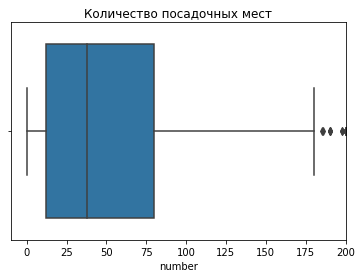

In [37]:
ax = sns.boxplot(x=df_3['number'])
ax.set_xlim(-10,200)
plt.title('Количество посадочных мест')
plt.show()


In [38]:
df_3['number'].describe()

count    1648.000000
mean       57.308859
std        85.579903
min         0.000000
25%        12.000000
50%        38.000000
75%        80.000000
max      1700.000000
Name: number, dtype: float64

Среднее кол-во мест для улиц с большим количеством объектов общественного питания - 38, что объясняется скорее всего дорогой площадью.

# Общий вывод
Мы подготовили исследование рынка о заведениях общественного питания в Москве.  

Мы загрузили данные (таблица rest_data). В файле мы не обнаружили пропущенные значения. Дубликаты данных отсутствуют. Тип данных в колонках верный.  

Мы исследовали соотношение видов объектов общественного питания по количеству.¶Среди предприятий общественного питания лидируют кафе и предприятие быстрого обслуживания.  

Исследовали соотношение сетевых и несетевых заведений. Большинство предприятий в городе - не сетевые.  

Также мы обнаружили, что сетевое распространение характерно больше всего для кафе и предприятий быстрого обслуживания.

Мы увидели, что для сетевых заведений характерно много заведений с небольшим числом посадочных мест.  

Среднее количество посадочных мест зависит от вида объекта общественного питания. Самое большое кол-во мест в столовой и ресторане.  

Мы построили график топ-10 улиц по количеству объектов общественного питания. Лидируют по кол-ву мест общественного питания улицы:
•Проспект Мира (СВАО);  
•Профсоюзная улица (ЮЗАО);  
•Ленинградский проспект (САО);  
•Пресненская набережная (ЦАО);  
•Варшавское шоссе (ЮАО);  
•Ленинский проспект (ЮЗАО);  
•проспект Вернадского (ЮЗАО);  
•Кутузовский проспект (ЗАО)  

Мы определили число улиц с одним объектом общественного питания. Их оказалось 579 и находятся они в разных районах Москвы. 

Мы также посмотрели на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Среднее кол-во мест для улиц с большим количеством объектов общественного питания - 38, что объясняется скорее всего дорогой площадью.



